In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH = 'Stare//training'

In [3]:
images=glob.glob(os.path.join(PATH,'images','*.tif'))
mask=glob.glob(os.path.join(PATH,'1st_manual','*.jpg'))
if not os.path.exists('./Stare/training/output_images'):
    os.makedirs('./Stare/training/output_images')
if not os.path.exists('./Stare/training/output_1st_manual'):
    os.makedirs('./Stare/training/output_1st_manual')
src = "./Stare/training/images/"
dst = "./Stare/training/output_images/"
src1= "./Stare/training/1st_manual/"
dst1 = "./Stare/training/output_1st_manual/"

In [4]:
cropheight=350
cropwidth = 350
k=-1
for file in images:
    k+=1
    im = Image.open(images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

Stare//training\images\41_training.tif (0, 0, 350, 350)
Stare//training\images\41_training.tif (0, 350, 350, 700)
Stare//training\images\41_training.tif (350, 0, 700, 350)
Stare//training\images\41_training.tif (350, 350, 700, 700)
Stare//training\images\42_training.tif (0, 0, 350, 350)
Stare//training\images\42_training.tif (0, 350, 350, 700)
Stare//training\images\42_training.tif (350, 0, 700, 350)
Stare//training\images\42_training.tif (350, 350, 700, 700)
Stare//training\images\43_training.tif (0, 0, 350, 350)
Stare//training\images\43_training.tif (0, 350, 350, 700)
Stare//training\images\43_training.tif (350, 0, 700, 350)
Stare//training\images\43_training.tif (350, 350, 700, 700)
Stare//training\images\44_training.tif (0, 0, 350, 350)
Stare//training\images\44_training.tif (0, 350, 350, 700)
Stare//training\images\44_training.tif (350, 0, 700, 350)
Stare//training\images\44_training.tif (350, 350, 700, 700)
Stare//training\images\45_training.tif (0, 0, 350, 350)
Stare//training\

In [5]:
cropheight=350
cropwidth = 350
k=-1
for file in mask:
    k+=1
    im = Image.open(mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.TIF' % (mask[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".TIF") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

Stare//training\1st_manual\41_manual1.jpg (0, 0, 350, 350)
Stare//training\1st_manual\41_manual1.jpg (0, 350, 350, 700)
Stare//training\1st_manual\41_manual1.jpg (350, 0, 700, 350)
Stare//training\1st_manual\41_manual1.jpg (350, 350, 700, 700)
Stare//training\1st_manual\42_manual1.jpg (0, 0, 350, 350)
Stare//training\1st_manual\42_manual1.jpg (0, 350, 350, 700)
Stare//training\1st_manual\42_manual1.jpg (350, 0, 700, 350)
Stare//training\1st_manual\42_manual1.jpg (350, 350, 700, 700)
Stare//training\1st_manual\43_manual1.jpg (0, 0, 350, 350)
Stare//training\1st_manual\43_manual1.jpg (0, 350, 350, 700)
Stare//training\1st_manual\43_manual1.jpg (350, 0, 700, 350)
Stare//training\1st_manual\43_manual1.jpg (350, 350, 700, 700)
Stare//training\1st_manual\44_manual1.jpg (0, 0, 350, 350)
Stare//training\1st_manual\44_manual1.jpg (0, 350, 350, 700)
Stare//training\1st_manual\44_manual1.jpg (350, 0, 700, 350)
Stare//training\1st_manual\44_manual1.jpg (350, 350, 700, 700)
Stare//training\1st_manu

In [6]:
PATH1 = 'Stare//training'

In [7]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.TIF'))

In [8]:
def get_data(path, resize_dim=128):
    img=cv2.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [9]:
def get_data_gif(path, resize_dim=128):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [10]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(72, 128, 128, 3)

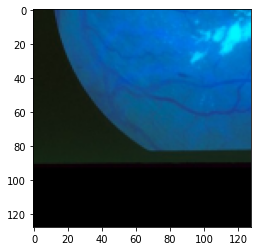

In [11]:
plt.imshow(orig_images[1])

In [13]:
masks=np.array([get_data(path) for path in mask])
masks.shape 

(72, 128, 128, 3)

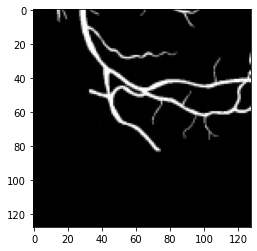

In [14]:
plt.imshow(masks[1])

In [15]:
masks.shape, orig_images.shape

((72, 128, 128, 3), (72, 128, 128, 3))

In [16]:
orig_images = orig_images / 255
masks = masks / 255

In [17]:
## location of VGG weights
VGG_Weights_path = "C:/Users/subah/fcn/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"


In [18]:
n_classes=3

In [19]:
def FCN8( nClasses ,  input_height=128, input_width=128):
    ## input_height and width must be devisible by 32 because maxpooling with filter size = (2,2) is operated 5 times,
    ## which makes the input_height and width 2^5 = 32 times smaller
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3)) ## Assume 224,224,3
    
    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)

    #x = Flatten(name='flatten')(x)
    #x = Dense(4096, activation='relu', name='fc1')(x)
    # <--> o = ( Conv2D( 4096 , ( 7 , 7 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(4096, activation='relu', name='fc2')(x)
    # <--> o = ( Conv2D( 4096 , ( 1 , 1 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)   
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(1000 , activation='softmax', name='predictions')(x)
    # <--> o = ( Conv2D( nClasses ,  ( 1 , 1 ) ,kernel_initializer='he_normal' , data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    
    vgg  = Model(  img_input , pool5  )
    vgg.load_weights(VGG_Weights_path) ## loading VGG weights for the encoder parts of FCN8
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    
    ## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 224, 224, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    model = Model(img_input, o)

    return model

model = FCN8(nClasses     = n_classes,  
             input_height = 128, 
             input_width  = 128)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [20]:
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(orig_images, masks, epochs = 500, batch_size= 16 , shuffle = True, validation_split = 0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 64 samples, validate on 8 samples
Epoch 1/500
64/64 [==============================] - 55s 856ms/step - loss: 0.5288 - accuracy: 0.6488 - val_loss: 0.4482 - val_accuracy: 0.7266
Epoch 2/500
64/64 [==============================] - 53s 831ms/step - loss: 0.4538 - accuracy: 0.7143 - val_loss: 0.4480 - val_accuracy: 0.7271
Epoch 3/500
64/64 [==============================] - 55s 860ms/step - loss: 0.4537 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 4/500
64/64 [==============================] - 56s 871ms/step - loss: 0.4537 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 5/500
64/64 [==============================] - 54s 850ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 6/500
64/64 [==============================] - 54s 844ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271

64/64 [==============================] - 60s 934ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 56/500
64/64 [==============================] - 63s 988ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 57/500
64/64 [==============================] - 66s 1s/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 58/500
64/64 [==============================] - 65s 1s/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 59/500
64/64 [==============================] - 59s 920ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 60/500
64/64 [==============================] - 62s 964ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 61/500
64/64 [==============================] - 60s 941ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoc

64/64 [==============================] - 56s 872ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 112/500
64/64 [==============================] - 51s 799ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 113/500
64/64 [==============================] - 51s 802ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 114/500
64/64 [==============================] - 56s 872ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 115/500
64/64 [==============================] - 51s 794ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 116/500
64/64 [==============================] - 53s 826ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 117/500
64/64 [==============================] - 55s 860ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy:

64/64 [==============================] - 50s 777ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 168/500
64/64 [==============================] - 51s 796ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 169/500
64/64 [==============================] - 48s 744ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 170/500
64/64 [==============================] - 49s 761ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 171/500
64/64 [==============================] - 49s 766ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 172/500
64/64 [==============================] - 48s 752ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 173/500
64/64 [==============================] - 47s 732ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy:

64/64 [==============================] - 45s 698ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 224/500
64/64 [==============================] - 50s 774ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 225/500
64/64 [==============================] - 47s 741ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 226/500
64/64 [==============================] - 49s 770ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 227/500
64/64 [==============================] - 50s 783ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 228/500
64/64 [==============================] - 49s 758ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 229/500
64/64 [==============================] - 50s 776ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy:

64/64 [==============================] - 44s 685ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 280/500
64/64 [==============================] - 50s 774ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 281/500
64/64 [==============================] - 50s 779ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 282/500
64/64 [==============================] - 51s 795ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 283/500
64/64 [==============================] - 49s 761ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 284/500
64/64 [==============================] - 49s 772ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 285/500
64/64 [==============================] - 50s 779ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy:

64/64 [==============================] - 52s 813ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 336/500
64/64 [==============================] - 52s 809ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 337/500
64/64 [==============================] - 52s 817ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 338/500
64/64 [==============================] - 52s 812ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 339/500
64/64 [==============================] - 48s 744ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 340/500
64/64 [==============================] - 52s 807ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 341/500
64/64 [==============================] - 51s 796ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy:

64/64 [==============================] - 53s 832ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 392/500
64/64 [==============================] - 56s 875ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 393/500
64/64 [==============================] - 51s 791ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 394/500
64/64 [==============================] - 52s 815ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 395/500
64/64 [==============================] - 52s 815ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 396/500
64/64 [==============================] - 57s 886ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 397/500
64/64 [==============================] - 55s 853ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy:

64/64 [==============================] - 49s 764ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 448/500
64/64 [==============================] - 50s 783ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 449/500
64/64 [==============================] - 54s 851ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 450/500
64/64 [==============================] - 51s 791ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 451/500
64/64 [==============================] - 49s 761ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 452/500
64/64 [==============================] - 52s 819ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy: 0.7271
Epoch 453/500
64/64 [==============================] - 50s 780ms/step - loss: 0.4536 - accuracy: 0.7144 - val_loss: 0.4479 - val_accuracy:

In [21]:
PATH2 = 'Stare//test'

In [22]:
t_images=glob.glob(os.path.join(PATH2,'images','*.tif'))

In [23]:
if not os.path.exists('./Stare/test/output_images'):
    os.makedirs('./Stare/test/output_images')
src = "./Stare/test/images/"
dst = "./Stare/test/output_images/"

In [24]:
cropheight=350
cropwidth = 350
k=-1
for file in t_images:
    k+=1
    im = Image.open(t_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

Stare//test\images\59_training.tif (0, 0, 350, 350)
Stare//test\images\59_training.tif (0, 350, 350, 700)
Stare//test\images\59_training.tif (350, 0, 700, 350)
Stare//test\images\59_training.tif (350, 350, 700, 700)
Stare//test\images\60_training.tif (0, 0, 350, 350)
Stare//test\images\60_training.tif (0, 350, 350, 700)
Stare//test\images\60_training.tif (350, 0, 700, 350)
Stare//test\images\60_training.tif (350, 350, 700, 700)


In [48]:
PATH3 = 'Stare//test'

In [49]:
t_images=glob.glob(os.path.join(PATH3,'output_images','*.tiff'))

In [50]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(8, 128, 128, 3)

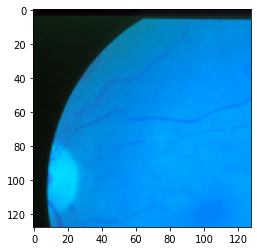

In [51]:
plt.imshow(test_images[0])

In [52]:
test_images.shape

(8, 128, 128, 3)

In [53]:
test_images = test_images / 255

In [54]:
imgs_mask_test = model.predict(test_images, verbose=1)

8/8 [==============================] - 1s 130ms/step


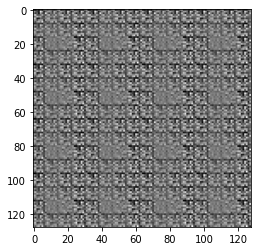

In [57]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
#plt.imsave('filename.png', i, cmap='gray')

In [58]:
yp = np.round(imgs_mask_test,0)

In [61]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

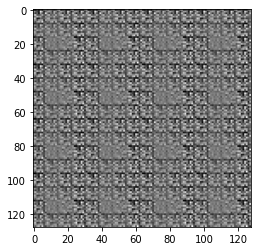

In [62]:
plt.imshow(i, cmap='gray')


In [63]:
imgs_mask_test.shape

(8, 128, 128, 3)